# Ex1

Santiago Benites 54392

João Ferreira 55312

In [66]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Use as a time series a sinusoidal function with 100 periods and 50 points per period, with:

In [67]:
# Generate the sinusoidal data
num_periods = 100
points_per_period = 50
total_points = num_periods * points_per_period
t = np.linspace(0, num_periods * 2 * np.pi, total_points)
sin_t = np.sin(t).reshape(-1, 1)

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)


y_train = sin_t[:train_split]
y_train = y_train.reshape(-1, points_per_period, 1)
x_train = t[:train_split].reshape(y_train.shape)

y_val = sin_t[train_split:]
y_val = y_val.reshape(-1, points_per_period, 1)
x_val = t[train_split:].reshape(y_val.shape)

# Split data into test set
start = int(total_points*0.5) #random.uniform(0, 1)
end = int(total_points*0.6)#random.uniform(start, 1)
y_test = sin_t[start:end]
y_test = y_test.reshape(-1, points_per_period, 1)
x_test = t[start:end].reshape(y_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(80, 50, 1)
(80, 50, 1)
(20, 50, 1)
(20, 50, 1)
(10, 50, 1)
(10, 50, 1)


## 1) no noise, clean.

In [68]:
# Define the model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Train the model
history = model1.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=1000
)



Epoch 1/1000
3/3 [==============================] - 2s 198ms/step - loss: 0.6429 - val_loss: 0.6740
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5793 - val_loss: 0.5794
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5415 - val_loss: 0.5411
Epoch 4/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5150 - val_loss: 0.5052
Epoch 5/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4985 - val_loss: 0.5174
Epoch 6/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.4984 - val_loss: 0.5191
Epoch 7/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.5029 - val_loss: 0.5194
Epoch 8/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.5013 - val_loss: 0.5100
Epoch 9/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.4965 - val_loss: 0.5001
Epoch 10/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.4934 - val_loss: 0.5020
Epoch 11

## Testing the Model

Input shape: (10, 50, 1)
Output shape: (10, 50, 1)


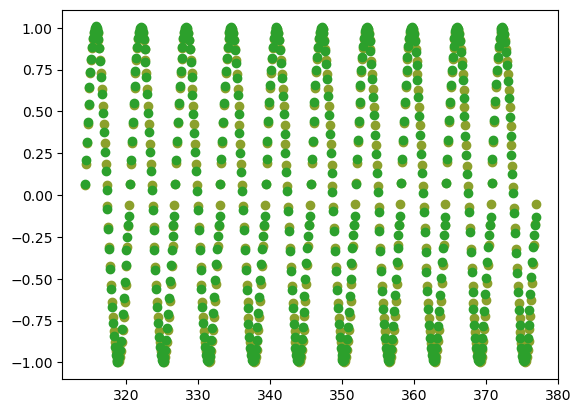

In [69]:
result = model1(x_test)

print('Input shape:', x_test.shape)
print('Output shape:', result.shape)

x_test = x_test.squeeze()

plt.scatter(x_test, y_test, label='Outputs', c='#8ca02c')
plt.scatter(x_test, result , label='Labels', c='#2ca02c')


plt.show()

## ii) with noise by adding a Gaussian N (0, 0.05).

In [88]:
# Generate the sinusoidal data
num_periods = 100
points_per_period = 50
total_points = num_periods * points_per_period
t = np.linspace(0, num_periods * 2 * np.pi, total_points)
sin_t = np.sin(t).reshape(-1, 1)

values_to_add = np.random.normal(0, 0.05, size=(5000,1))
sin_t = sin_t + values_to_add.reshape(5000, 1)

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)


y_train = sin_t[:train_split]
y_train = y_train.reshape(-1, points_per_period, 1)
x_train = t[:train_split].reshape(y_train.shape)

y_val = sin_t[train_split:]
y_val = y_val.reshape(-1, points_per_period, 1)
x_val = t[train_split:].reshape(y_val.shape)

# Split data into test set
start = int(total_points*0.5) #random.uniform(0, 1)
end = int(total_points*0.6)#random.uniform(start, 1)
y_test = sin_t[start:end]
y_test = y_test.reshape(-1, points_per_period, 1)
x_test = t[start:end].reshape(y_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(80, 50, 1)
(80, 50, 1)
(20, 50, 1)
(20, 50, 1)
(10, 50, 1)
(10, 50, 1)


In [89]:
# Define the model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.GaussianNoise(0, 0.05),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(optimizer='adam', loss='mse')


# Train the model
history = model2.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=1000
)



Epoch 1/1000
3/3 [==============================] - 2s 173ms/step - loss: 0.6149 - val_loss: 0.6193
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.5999 - val_loss: 0.6072
Epoch 3/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.5872 - val_loss: 0.5960
Epoch 4/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.5764 - val_loss: 0.5855
Epoch 5/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.5668 - val_loss: 0.5758
Epoch 6/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.5579 - val_loss: 0.5669
Epoch 7/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.5499 - val_loss: 0.5588
Epoch 8/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.5422 - val_loss: 0.5514
Epoch 9/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.5353 - val_loss: 0.5448
Epoch 10/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.5291 - val_loss: 0.5389
Epoch 11

## Testing the model

Input shape: (10, 50, 1)
Output shape: (10, 50, 1)


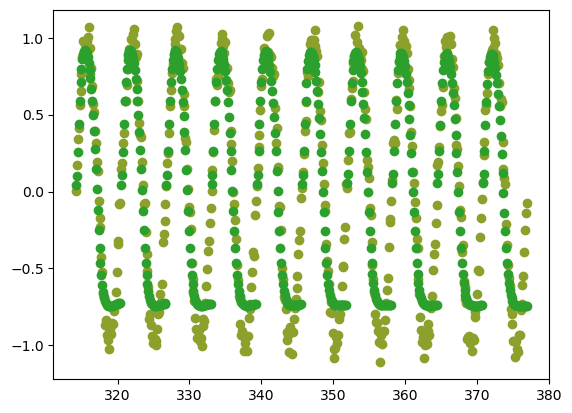

In [90]:
result = model2(x_test)

print('Input shape:', x_test.shape)
print('Output shape:', result.shape)

x_test = x_test.squeeze()

plt.scatter(x_test, y_test, label='Outputs', c='#8ca02c')
plt.scatter(x_test, result , label='Labels', c='#2ca02c')


plt.show()